#  Segunda entrega Novos piratas
**Nome**: Vítor Hideki Ishikura  
**NUSP**: 9344921

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import seaborn as sns
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Exercício 1

In [4]:
df_1=df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
df_2=df_1.groupby(['Store'])['Weekly_Sales'].sum().reset_index()


In [5]:


df_1=df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
df_2=df_1.groupby(['Store'])['Weekly_Sales'].sum().reset_index()


In [6]:
df_1=df_1.groupby(['Date'])['Weekly_Sales'].mean().reset_index()
df_1.head()

,Date,Weekly_Sales
0,2010-02-05,1.105572e+06
1,2010-02-12,1.074148e+06
2,2010-02-19,1.072822e+06
3,2010-02-26,9.770794e+05
4,2010-03-05,1.041588e+06


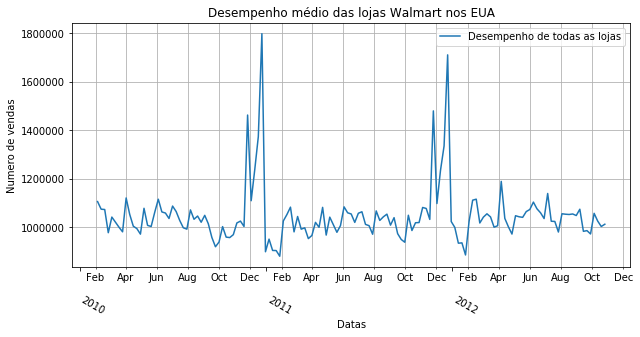

In [91]:
# Plot de datas
fig, ax = plt.subplots()
dates_x =dates.datestr2num(df_1.Date)
ax.plot_date(dates_x, df_1.Weekly_Sales,'-', label ='Desempenho de todas as lojas')
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b\n'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))
plt.gcf().autofmt_xdate( ha='left', rotation= -30)
fig.set_size_inches(10,5)
plt.legend()
plt.title('Desempenho médio das lojas Walmart nos EUA')
plt.xlabel('Datas')
plt.ylabel('Numero de vendas')
plt.show()

Um dos melhores tipos de gráficos para representar uma tendência em um espaço de tempo é o gráfico de linha.     
Como estamos analisando o desempenho semanal ao longo de um intervalo de tempo, esse gráfico apresenta mais informações relevantes.

## Exercício 2

In [8]:
df_2=df.groupby(['Store'])['Weekly_Sales'].sum().reset_index()

In [9]:
df_2.columns = ['Store', 'Total_Sales']
df_2.head()

,Store,Total_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


In [10]:
storesDf_best=df_2.sort_values(by='Total_Sales',ascending=False).reset_index(drop=True)

As 10 lojas que mais venderam nesse período de tempo foram as seguintes: 

In [11]:
storesDf_best[0:10]

,Store,Total_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [12]:
storesDfmean_best=df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
storesDfmean_best=storesDfmean_best[storesDfmean_best['Store'].isin(storesDf_best[0:10].Store)]
storesDfmean_best.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [13]:
storesDfmean_best=storesDfmean_best.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

In [14]:
storesDfmean_best.head()

,Date,Weekly_Sales
0,2010-02-05,1985848.062
1,2010-02-12,1860623.870
2,2010-02-19,1897889.402
3,2010-02-26,1701143.406
4,2010-03-05,1798203.899


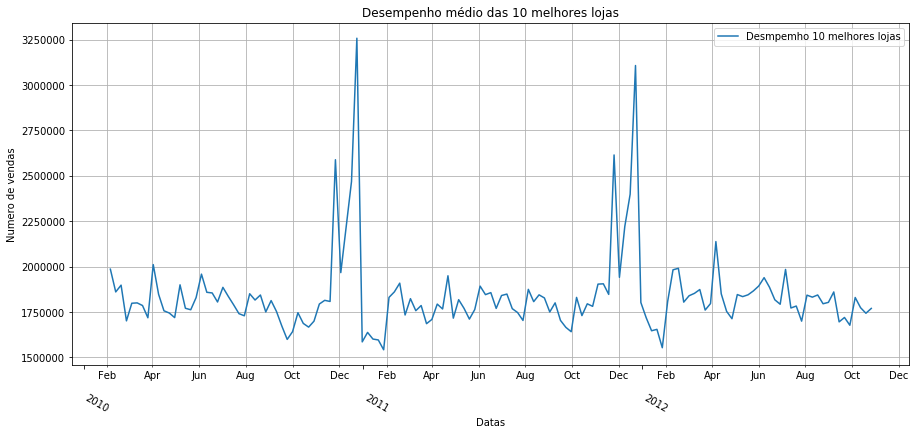

In [90]:
fig2, ax2 = plt.subplots()
dates_x =dates.datestr2num(storesDfmean_best.Date)
ax2.plot_date(dates_x, storesDfmean_best.Weekly_Sales,'-',label='Desmpemho 10 melhores lojas')
ax2.xaxis.set_minor_locator(dates.MonthLocator(interval=2))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%b\n'))
ax2.xaxis.grid(True, which="minor")
ax2.yaxis.grid()
ax2.xaxis.set_major_locator(dates.YearLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))
plt.gcf().autofmt_xdate( ha='left', rotation= -30)
fig2.set_size_inches(15,7)
plt.legend()
plt.title('Desempenho médio das 10 melhores lojas')
plt.xlabel('Datas')
plt.ylabel('Numero de vendas')
plt.show()

## Exercício 3

In [16]:
storesDf_worst=df_2.sort_values(by='Total_Sales',ascending=True).reset_index(drop=True)

As 10 lojas que menos vendaram são as seguintes:

In [17]:
storesDf_worst.head(10)

,Store,Total_Sales
0,33,37160221.96
1,44,43293087.84
2,5,45475688.90
3,36,53412214.97
4,38,55159626.42
5,3,57586735.07
6,30,62716885.12
7,37,74202740.32
8,16,74252425.40
9,29,77141554.31


In [18]:
storesDfmean_worst=df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
storesDfmean_worst=storesDfmean_worst[storesDfmean_worst['Store'].isin(storesDf_worst[0:10].Store)]
storesDfmean_worst.head()

,Store,Date,Weekly_Sales
286,3,2010-02-05,461622.22
287,3,2010-02-12,420728.96
288,3,2010-02-19,421642.19
289,3,2010-02-26,407204.86
290,3,2010-03-05,415202.04


In [19]:
storesDfmean_worst=storesDfmean_worst.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

In [20]:
storesDfmean_worst.head()

,Date,Weekly_Sales
0,2010-02-05,417768.159
1,2010-02-12,415501.772
2,2010-02-19,407357.937
3,2010-02-26,393396.681
4,2010-03-05,410371.974


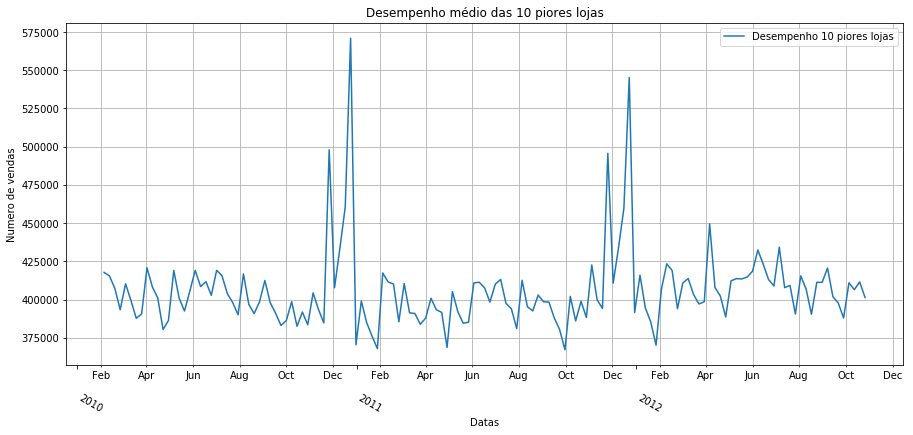

In [88]:
fig3, ax3 = plt.subplots()
dates_x =dates.datestr2num(storesDfmean_worst.Date)
ax3.plot_date(dates_x, storesDfmean_worst.Weekly_Sales,'-',label='Desempenho 10 piores lojas')
ax3.xaxis.set_minor_locator(dates.MonthLocator(interval=2))
ax3.xaxis.set_minor_formatter(dates.DateFormatter('%b\n'))
ax3.xaxis.grid(True, which="minor")
ax3.yaxis.grid()
ax3.xaxis.set_major_locator(dates.YearLocator())
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))
plt.gcf().autofmt_xdate( ha='left', rotation= -30)
fig3.set_size_inches(15,7)
plt.legend()
plt.title('Desempenho médio das 10 piores lojas')
plt.xlabel('Datas')
plt.ylabel('Numero de vendas')
plt.show()

## Exercício 4

In [22]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [23]:
noHolidaydf=df[df['IsHoliday'] == False].groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()

In [24]:
noHoliday=noHolidaydf.groupby(['Store'])['Weekly_Sales'].mean().reset_index()

A **média** de Vendas para semanas **sem feriado** é:

In [41]:
noHoliday['Weekly_Sales'].mean()

1041256.3802088557

A **mediana** de Vendas para semanas **sem feriado** é:

In [52]:
noHolidaydf['Weekly_Sales'].median()

956211.1999999998

In [43]:
withHolidaydf=df[df['IsHoliday'] == True].groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()

In [44]:
withHoliday=withHolidaydf.groupby(['Store'])['Weekly_Sales'].mean().reset_index()

A **média** de Vendas para semanas **com feriado** é:


In [32]:
withHoliday['Weekly_Sales'].mean()

1122887.8923555552

A **mediana** de Vendas para semanas **com feriado** é:

In [56]:
withHolidaydf['Weekly_Sales'].median()

1018538.0399999999

In [34]:
dfPlotNoHoliday=noHolidaydf.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

In [35]:
dfPlotNoHoliday.shape

(133, 2)

In [36]:
dfPlotWithHoliday=withHolidaydf.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

In [37]:
dfPlotWithHoliday

,Date,Weekly_Sales
0,2010-02-12,1.074148e+06
1,2010-09-10,1.014098e+06
2,2010-11-26,1.462689e+06
3,2010-12-31,8.985004e+05
4,2011-02-11,1.051915e+06
5,2011-09-09,1.039183e+06
6,2011-11-25,1.479858e+06
7,2011-12-30,1.023166e+06
8,2012-02-10,1.111320e+06
9,2012-09-07,1.074001e+06


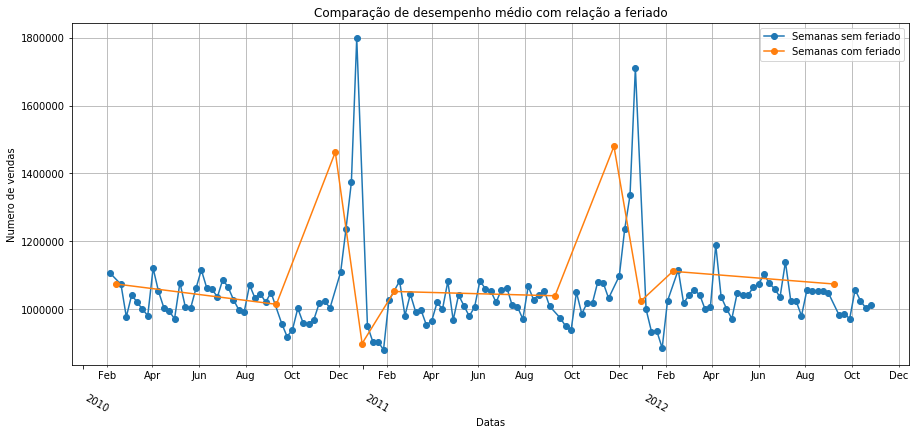

In [57]:

fig4, ax4 = plt.subplots()
dates_n =dates.datestr2num(dfPlotNoHoliday.Date)
ax4.plot_date(dates_n, dfPlotNoHoliday.Weekly_Sales,'-o', label='Semanas sem feriado')

dates_w =dates.datestr2num(dfPlotWithHoliday.Date)
ax4.plot_date(dates_w, dfPlotWithHoliday.Weekly_Sales,'-o', label='Semanas com feriado')

ax4.xaxis.set_minor_locator(dates.MonthLocator(interval=2))
ax4.xaxis.set_minor_formatter(dates.DateFormatter('%b\n'))
ax4.xaxis.grid(True, which="minor")
ax4.yaxis.grid()
ax4.xaxis.set_major_locator(dates.YearLocator())
ax4.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))
plt.gcf().autofmt_xdate( ha='left', rotation= -30)
fig4.set_size_inches(15,7)
plt.legend()
plt.title('Comparação de desempenho médio com relação a feriado')
plt.xlabel('Datas')
plt.ylabel('Numero de vendas')
plt.show()

Os Feriados impactam de forma positiva nas vendas. Em média, feriados apresentam 8% mais vendas do que fora de feriados. Sendo os mais importantes, os feriados de final de ano.

## Bônus